#**Outliers**

## **What is an outlier?**
-  In statistics, an outlier is an observation point that is distant from other observations.

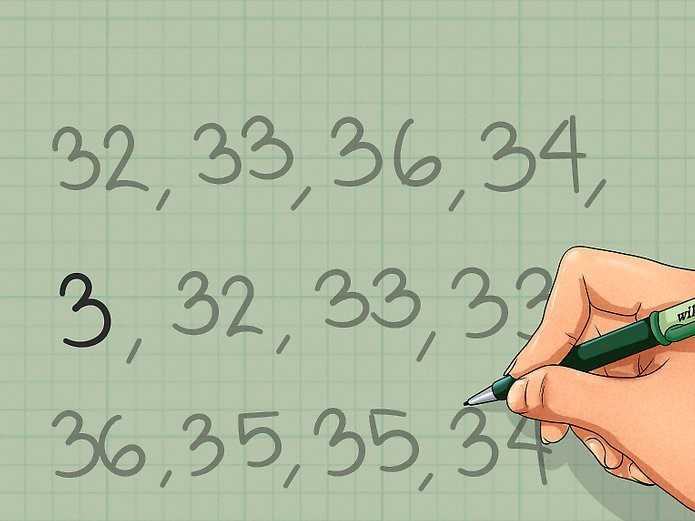

Outliers can have many causes, such as:
- Measurement or input error.
- Data corruption.
- True outlier observation.

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data. This does not mean that the values identified are outliers and should be removed. A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationships or patterns to the outliers. If there is, perhaps they are not outliers and can be explained, or perhaps the outliers themselves can be identified more systematically.

There are two types of outliers:
1. Univariate outliers
2. Multivariate outliers

Univariate outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height

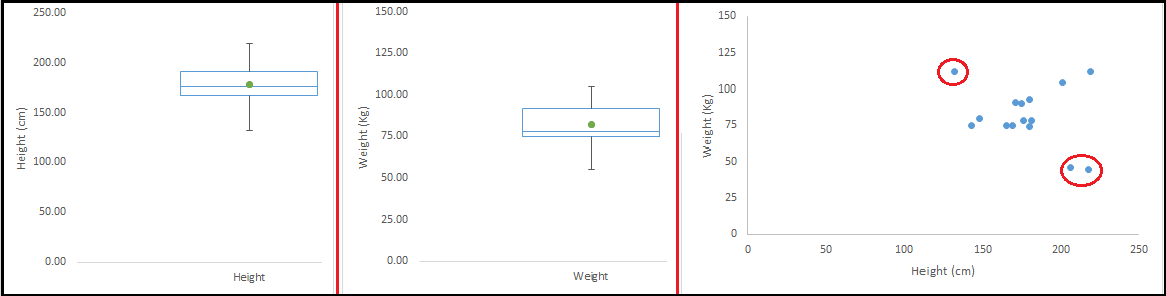

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.


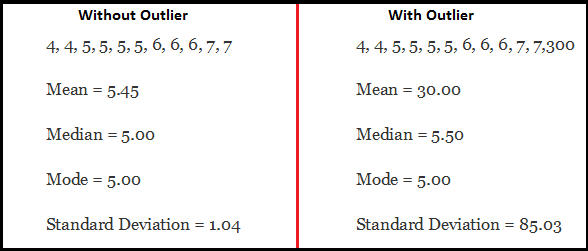

# **Detecting Outliers**

## **Univariate Outliers**

We will be using the Boston House Pricing Dataset which can be found in Scikit-learn datasets


The dataset columns include:
    
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population

In [52]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/mohamed-ashry7/Data-Engineering-Lab/main/Datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../Datasets/{dataset_name}'

Run the code below to import the dataset.

In [2]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### **Box Plot**

Box plots can be used to show the outliers as dots outside the box. 

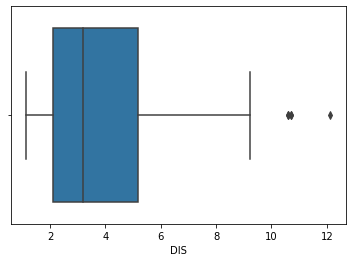

In [7]:
sns.boxplot(x=boston_df['DIS'])

[array([2.100175, 1.1296  ]), array([5.188425, 9.2229  ])]

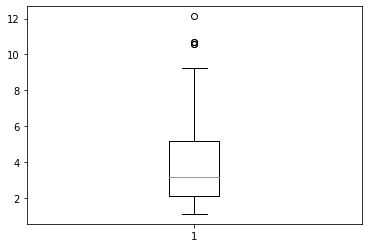

In [6]:
B = plt.boxplot(x=boston_df['DIS'])
[item.get_ydata() for item in B['whiskers']]


In [8]:
[flier.get_ydata() for flier in B["fliers"]]

[array([10.7103, 10.7103, 12.1265, 10.5857, 10.5857])]

The above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observations i.e no where near the quartiles.

### **Interquartile Range**

Interquartile range (IQR) is the third quartile of data - the first quartile (Q3 - Q1). In order to create the quartiles or percentiles, make sure that your data is in ascending order first and then take the first and third quartiles to calculate the IQR.

 The rule is that any value below **Q1-1.5*IQR** or above **Q3+1.5*IQR** is an outlier.

We will be calculating the IQR for all the columns using the `quantile` method. 

In [13]:
boston_df_o1 = boston_df

Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [64]:
print(boston_df_o1 < (Q1 - 1.5 * IQR)) or (boston_df_o1 > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
dataset_cleared_iqr = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cleared_iqr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48



### **Z-Score**

while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
We will use Z-score function defined in scipy library to detect the outliers.

For example, let's remove the outliers from the CRIM column in our dataset. First, we will calculate the z-score for the CRIM column then we can filter the rows so we keep only the rows where the value of CRIM is not considered to be an outlier

In [9]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df['CRIM']))

In [10]:
filtered_entries = z < 3
filtered_entries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
df_zscore_filter = boston_df[filtered_entries]

In [12]:
print(df_zscore_filter.shape)
print(boston_df.shape)

(498, 13)
(506, 13)


## **Multivariate Outliers**

### **Scatter Plot**

If we take a look at a scatter plot, we can detect outliers by seeing the points that are away from the majority of the data points. 

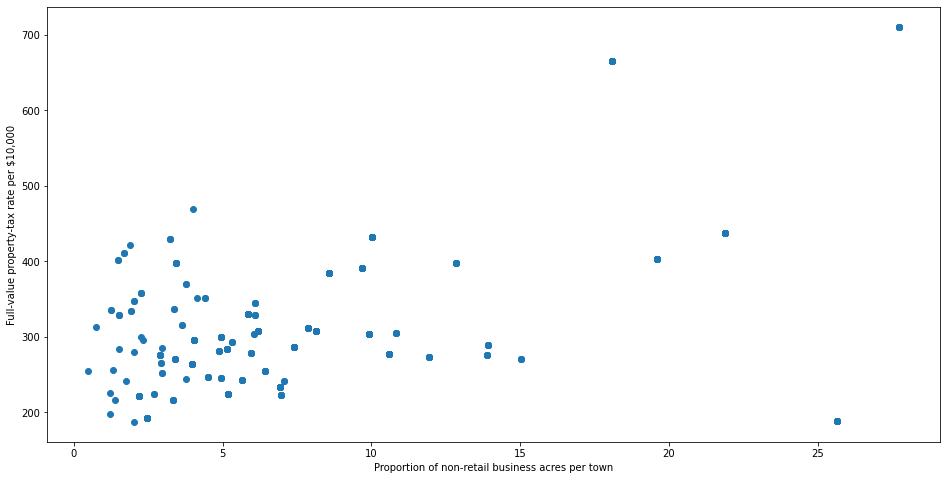

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

### **Local Outlier Factor**

The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers. The scikit-learn library provides an implementation of this approach in the LocalOutlierFactor class.



In [37]:
from pandas import read_csv
from sklearn.neighbors import LocalOutlierFactor

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
data = df.values

X = data[:,:-1]
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)
df.head()

(506, 13)
(465, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** 

Two important parameters are required for DBSCAN: epsilon (“eps”) and minimum points (“MinPts”). The parameter eps defines the radius of neighborhood around a point x. It's called called the ϵ-neighborhood of x. The parameter MinPts is the minimum number of neighbors within “eps” radius.

In [54]:
from sklearn.cluster import DBSCAN

df_insurance = pd.read_csv(get_path('insurance.csv'))
X = df_insurance[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

Let's plot to differentiate the outliers. I'll set the blue colour to normal records and red colour to outliers.¶


Text(0, 0.5, 'BMI')

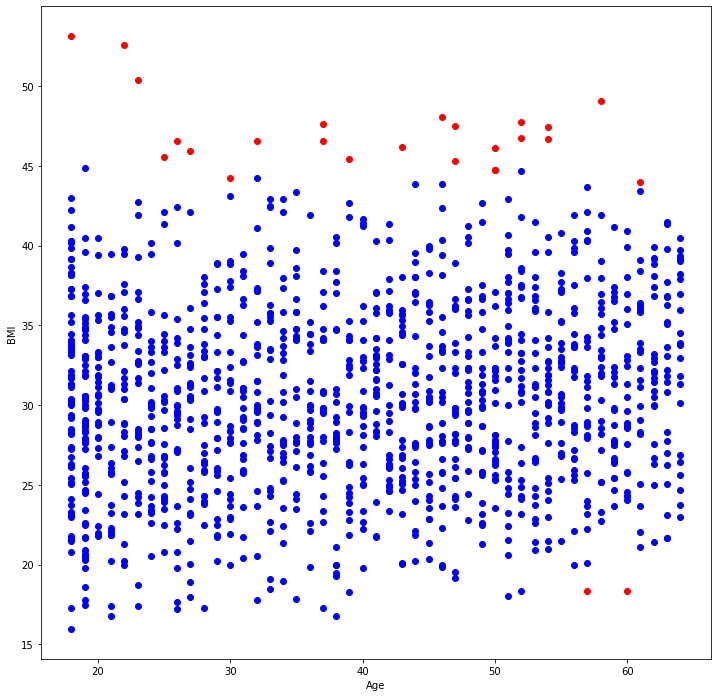

In [59]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[sample_mask,0], X[sample_mask, 1], 'o', color=color);
plt.xlabel('Age')
plt.ylabel('BMI')


# **Outliers Exercise 1**

Use the following outlier methods on the following dataset: 'heart.csv'


### Using IQR on the 'chol' column:

In [ ]:
#Your solution here


### Using LOF on the 'chol' and 'age' columns:

In [ ]:
#Your solution here

# **Outliers Exercise 2**

Using the insurance dataset(insurance.csv) find the number of outliers in the charges column using the z-score method.

In [ ]:
#Your code here

# References

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified

https://medium.com/@agarwalvibhor84/lets-cluster-data-points-using-dbscan-278c5459bee5